In [71]:
from notion2pandas import Notion2PandasClient
import sys
sys.path.append('../../')
import pandas as pd

import meas_analysis.handy as hy
import scresonators.fit_resonator.ana_resonator as ana_res
import scresonators.fit_resonator.ana_tls as ana_tls

shan_token = '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'
token = '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'
n2p = Notion2PandasClient(auth=token)

lnk = 'c2f3395c7ed34b3684c8b881290c5c7c' # Resonators 
#lnk = '1188a47d722080a297ddf2f21c956b4c' # Llotsa

## Load data

In [72]:
pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
folder = 'My Drive/Projects/Materials/'
pth = pth_base+folder
img_pth = pth+'Outputs/Resonators/'
#pnames = ['240814-2','240725','240729-2', '240729-4']
#labs = ['ScalinQ (No HF)', 'SLab (No HF)', 'SLab (HF)', 'RFSoC (HF)'] 
j=0
#pnames = ['240729-2', '240729-3']
pnames = ['240729-3', '240820_soc']
labs = ['VNA (HF)', 'RFSoC (HF)'] 
plist =[]
#labs = ['SLab (HF)',, 'SLab (No HF)', 'ScalinQ (No HF)' 'RFSoC (HF)'] 

pnames = ['240729-2.yml','240725_vna.yml','240814-2.yml']#,'240729-4']

#pnames=['241108-Resonatorsilicon-waffle-kink3.yml']

for p in pnames:
    plist.append(hy.load(img_pth +'Text/'+ p))

#ana_tls.plot_res_pars(plist, labs,img_pth)
#ana_res.plot_res_pars(plist, labs,img_pth)


## Grab the data we want from yml, and add a few more fields

In [73]:
# Now, make a df that has the same columns as the notion DB

cols=['freqs', 'pitch', 'qc', 'qc_err', 'qother', 'qtls0', 'qtls0_err', 'qother_err', 'target_freq']
new_df = pd.DataFrame({col: plist[j][col] for col in cols})

names = ['Sapp1_HF', 'Sapp1_NoHF', 'Sapp1_SQ', 'Sil1', 'Sil1_SQ', 'Sil2Sputt']
# 3 from the first sappphrie wafer 
# 2 from silicon 
# 2 from 2nd silicon :(
# 
if names[j]=='Sapp1_HF':
    metal = 'Nb'
    substrate='Sapphire'
    depo = 'KJL2'
    notes = 'HF'
    meas='VNA'
    package = 'SLab'
    time_dict =  {'start': '2024-07-29', 'end': None, 'time_zone': None}
elif names[j]=='Sapp1_NoHF':
    metal = 'Nb'
    substrate='Sapphire'
    depo = 'KJL2'
    notes = ''
    meas='VNA'
    package = 'SLab'

    time_dict =  {'start': '2024-07-29', 'end': None, 'time_zone': None}
elif names[j]=='Sapp1_SQ':
    metal = 'Nb'
    substrate='Sapphire'
    depo = 'KJL2'
    notes = ''
    meas='VNA'
    package = 'SLab'

    time_dict =  {'start': '2024-08-14', 'end': None, 'time_zone': None}
elif names[j]=='Sil1_SQ':
    metal = 'Nb'
    substrate='Silicon'
    depo = 'KJL2'
    notes = ''
    meas='VNA'
    package = 'ScalinQ'
    time_dict =  {'start': '2024-09-08', 'end': None, 'time_zone': None}
elif names[j]=='Sil2Sputt':
    metal = 'Nb'
    substrate='Silicon'
    depo = 'sputterer'
    notes = ''
    meas='RFSoC'
    package = 'SLab'
    time_dict =  {'start': '2024-11-08', 'end': None, 'time_zone': None}

name = names[j]
new_df['Date'] = new_df.apply(lambda row: time_dict, axis=1)
new_df['Metal'] = metal
new_df['Substrate'] = substrate
new_df['Depo']=depo
new_df['Package']=package
new_df['Measurement']=meas
new_df['Notes'] = notes
new_df['PageID']=''
new_df['Row_Hash']=''
new_df['Fridge Cool Down']=''
new_df['Name']=name
new_df['Samples']=''

new_df.rename(columns={'pitch': 'Gap (um)', 'qtls0': 'QTLS0 (1e6)', 'qother': 'Qother (1e6)', 'qother_err':'Qother err (1e6)', 'qc':'Qc (1e6)', 'qc_err':'Qc err (1e6)','qtls0_err':'QTLS0 err (1e6)', 'target_freq':'Target Freq. (GHz)', 'freqs':'Freq (GHz)' }, inplace=True)
#df = df.append(new_row, ignore_index=True)
round_cols = ['QTLS0 (1e6)', 'Qother (1e6)', 'Qc (1e6)', 'Qc err (1e6)', 'QTLS0 err (1e6)', 'Qother err (1e6)']
new_df[round_cols] = new_df[round_cols] / 1e6
new_df['Freq (GHz)'] = new_df['Freq (GHz)'] / 1e9

new_df[round_cols] = new_df[round_cols].round(4)
f_cols = ['Freq (GHz)', 'Target Freq. (GHz)']
new_df[f_cols] = new_df[f_cols].round(7)
#new_df = new_df.astype(str)

In [74]:
new_df

,Freq (GHz),Gap (um),Qc (1e6),Qc err (1e6),Qother (1e6),QTLS0 (1e6),QTLS0 err (1e6),Qother err (1e6),Target Freq. (GHz),Date,...,Substrate,Depo,Package,Measurement,Notes,PageID,Row_Hash,Fridge Cool Down,Name,Samples
0,6.711793,2,3.5375,0.0469,30.0000,0.4152,0.0275,63.5553,7.0,"{'start': '2024-07-29', 'end': None, 'time_zon...",...,Sapphire,KJL2,SLab,VNA,HF,,,,Sapp1_HF,
1,7.063647,4,1.7550,0.0100,30.0000,0.6649,0.1582,163.1947,7.2,"{'start': '2024-07-29', 'end': None, 'time_zon...",...,Sapphire,KJL2,SLab,VNA,HF,,,,Sapp1_HF,
2,7.447058,6,1.8499,0.0112,30.0000,0.3628,0.2231,242.4101,7.5,"{'start': '2024-07-29', 'end': None, 'time_zon...",...,Sapphire,KJL2,SLab,VNA,HF,,,,Sapp1_HF,
3,7.785142,8,2.0217,0.0113,30.0000,0.7460,0.1207,106.9697,7.9,"{'start': '2024-07-29', 'end': None, 'time_zon...",...,Sapphire,KJL2,SLab,VNA,HF,,,,Sapp1_HF,
4,5.816871,10,1.3845,0.0017,0.6846,1.3786,0.2225,0.0227,5.9,"{'start': '2024-07-29', 'end': None, 'time_zon...",...,Sapphire,KJL2,SLab,VNA,HF,,,,Sapp1_HF,
5,6.136373,12,2.6021,0.0049,1.4169,0.4201,0.5710,0.6241,6.2,"{'start': '2024-07-29', 'end': None, 'time_zon...",...,Sapphire,KJL2,SLab,VNA,HF,,,,Sapp1_HF,
6,6.423086,14,1.6472,0.0039,NaN,NaN,NaN,NaN,6.5,"{'start': '2024-07-29', 'end': None, 'time_zon...",...,Sapphire,KJL2,SLab,VNA,HF,,,,Sapp1_HF,
7,6.723181,16,0.3110,0.0003,0.3480,1.1820,0.2615,0.0160,6.7,"{'start': '2024-07-29', 'end': None, 'time_zon...",...,Sapphire,KJL2,SLab,VNA,HF,,,,Sapp1_HF,


### Load notion database and get info

In [75]:
notion_df = n2p.from_notion_DB_to_dataframe(lnk)

### They need to have all the same rows and columns

In [76]:
#print(notion_df.columns)
#print(new_df.columns)

common_columns = notion_df.columns.intersection(new_df.columns)
print("Common columns:", common_columns)

notion_only_columns = notion_df.columns.difference(new_df.columns)
print("Columns only in notion_df:", notion_only_columns)

new_df_only_columns = new_df.columns.difference(notion_df.columns)
print("Columns only in new_df:", new_df_only_columns)

Common columns: Index(['Gap (um)', 'Target Freq. (GHz)', 'Qother (1e6)', 'Measurement',
       'Notes', 'Freq (GHz)', 'Package', 'Qother err (1e6)', 'Qc err (1e6)',
       'Samples', 'QTLS0 (1e6)', 'Fridge Cool Down', 'Depo', 'QTLS0 err (1e6)',
       'Qc (1e6)', 'Date', 'Metal', 'Substrate', 'Name', 'PageID', 'Row_Hash'],
      dtype='object')
Columns only in notion_df: Index([], dtype='object')
Columns only in new_df: Index([], dtype='object')


### Combine DFs

In [77]:
combined_df = pd.concat([notion_df, new_df], ignore_index=True)
print(combined_df)
#combined_df.columns

    Gap (um)  Target Freq. (GHz)  Qother (1e6) Measurement Notes  Freq (GHz)  \
0       16.0                 6.7        0.3983         VNA          6.729209   
1       14.0                 6.5        0.8942         VNA          6.429811   
2       12.0                 6.2        1.0615         VNA          6.142840   
3       10.0                 5.9        1.7086         VNA          5.825969   
4        8.0                 7.9        6.5224         VNA          7.793015   
5        6.0                 7.5        3.1478         VNA          7.462017   
6        4.0                 7.2       30.0000         VNA          7.083855   
7        2.0                 7.0        5.1472         VNA          6.734489   
8       16.0                 6.7        2.3400         VNA          6.674738   
9       14.0                 6.5        8.2775         VNA          6.432145   
10      12.0                 6.2        7.3837         VNA          6.078939   
11      10.0                 5.9        

### Update notion

In [78]:
n2p.update_notion_DB_from_dataframe(lnk, combined_df)


In [24]:
import os
import requests

# Load environment variables from .env file
from dotenv import load_dotenv
load_dotenv(override=True)

notion_key = token

# Replace this with an ID of a page in your workspace that is connected to the integration
parent_page_id = "828ec62dc8e24354848216bcd345e421" 

headers = {'Authorization': f"Bearer {notion_key}",
        'Content-Type': 'application/json', 'Notion-Version': '2022-06-28'}

minimum = {
    "parent": {
        "type": "page_id",
        "page_id": parent_page_id
    },
    "properties": {
        "Name": {
            "title": {}
        }
    }
}

url = "https://api.notion.com/v1/databases"
response = requests.post(url, json=minimum, headers=headers)
print(response.text)

{"object":"database","id":"14d8a47d-7220-8190-a811-f943dea098dc","cover":null,"icon":null,"created_time":"2024-11-29T21:58:00.000Z","created_by":{"object":"user","id":"2c76d140-263b-420e-937e-940353c6bc24"},"last_edited_by":{"object":"user","id":"2c76d140-263b-420e-937e-940353c6bc24"},"last_edited_time":"2024-11-29T21:58:00.000Z","title":[],"description":[],"is_inline":false,"properties":{"Name":{"id":"title","name":"Name","type":"title","title":{}}},"parent":{"type":"page_id","page_id":"828ec62d-c8e2-4354-8482-16bcd345e421"},"url":"https://www.notion.so/14d8a47d72208190a811f943dea098dc","public_url":null,"archived":false,"in_trash":false,"request_id":"746aba70-a78d-427e-a534-e372a4fb9f44"}


In [28]:
import json
import os
page_id = '828ec62dc8e24354848216bcd345e421'
import requests

class NotionClient():
    def __init__(self, notion_key):
        self.notion_key = notion_key
        self.default_headers = {'Authorization': f"Bearer {self.notion_key}",
                                'Content-Type': 'application/json', 'Notion-Version': '2022-06-28'}
        self.session = requests.Session()
        self.session.headers.update(self.default_headers)    

    def create_database(self, data):
        url = "https://api.notion.com/v1/databases"
        response = self.session.post(url, json=data)
        return response.json()

def main(page_id):
    notion_client = NotionClient(token)

    # Create a database with some properties
    catches = {
        "parent": {
            "type": "page_id",
            "page_id": page_id
        },
        "icon": {
            "type": "emoji",
                "emoji": "🐟"
        },
        "title": [
            {
                "type": "text",
                "text": {
                    "content": "Catches",
                    "link": None
                }
            }
        ],
        "properties": {
            "Name": {
                "title": {}
            },
            "Weight (lbs)": {
                "number": {}
            },
            "Location": {
                "rich_text": {}
            },
            "Date": {
                "date": {}
            },    
            "Species": {
                "select": {
                    "options": [
                        {
                            "name": "Northern Pike",
                            "color": "green"
                        },
                        {
                            "name": "Walleye",
                            "color": "red"
                        },
                        {
                            "name": "Smallmouth Bass",
                            "color": "pink"
                        }
                    ]
                }
            }       
        }
    }

    catches_create_response = notion_client.create_database(catches)
    print(json.dumps(catches_create_response, indent=2))

# if __name__ == "__main__":
#     import argparse
#     from dotenv import load_dotenv
#     load_dotenv(override=True)
#     parser = argparse.ArgumentParser(description='Example script to create notion databases.')
#     parser.add_argument('page_id', type=str,
#                         help='A Notion Page ID to create the databases under')

#     args = parser.parse_args()

#     main(args.page_id)

In [87]:
notion_df = n2p.from_notion_DB_to_dataframe(lnk)

Index(['Gap (um)', 'Target Freq. (GHz)', 'Qother (1e6)', 'Measurement',
       'Notes', 'Freq (GHz)', 'Package', 'Qother err (1e6)', 'Qc err (1e6)',
       'Samples', 'QTLS0 (1e6)', 'Fridge Cool Down', 'Depo', 'QTLS0 err (1e6)',
       'Qc (1e6)', 'Date', 'Metal', 'Substrate', 'Name', 'PageID', 'Row_Hash'],
      dtype='object')


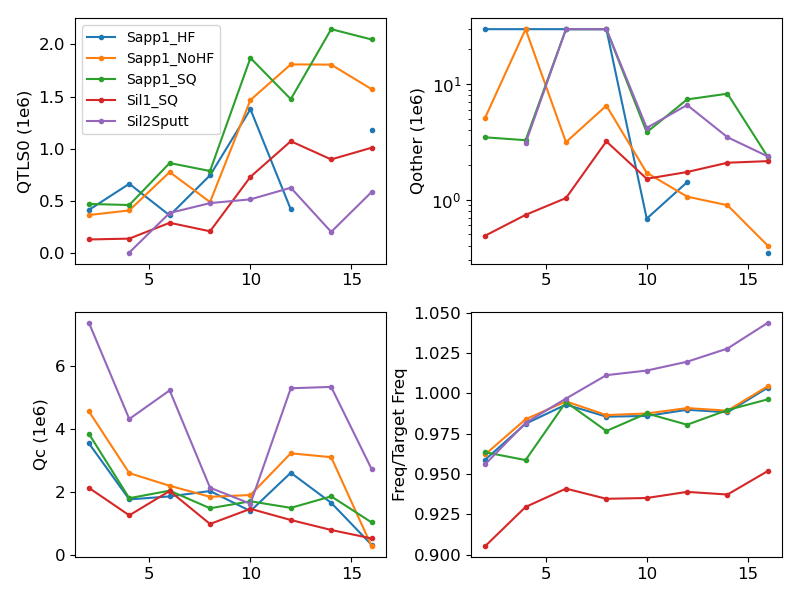

In [88]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(8,6))

print(notion_df.columns)

ax=ax.flatten()

grouped = notion_df.groupby('Name')
%matplotlib widget
for i, (name, group) in enumerate(grouped):
    ax[0].plot(group['Gap (um)'], group['QTLS0 (1e6)'], '.-',label=name)
    ax[1].semilogy(group['Gap (um)'], group['Qother (1e6)'], '.-',label=name)
    ax[2].plot(group['Gap (um)'], group['Qc (1e6)'], '.-',label=name)
    ax[3].plot(group['Gap (um)'], group['Freq (GHz)']/group['Target Freq. (GHz)'], '.-',label=name)

ax[0].set_ylabel('QTLS0 (1e6)')
ax[1].set_ylabel('Qother (1e6)')
ax[2].set_ylabel('Qc (1e6)')
ax[3].set_ylabel('Freq/Target Freq')

ax[0].legend(fontsize=10)
fig.tight_layout()

In [29]:
b = NotionClient(token)

In [36]:
main(page_id)

{
  "object": "error",
  "status": 400,
  "code": "validation_error",
  "message": "Title is not provided",
  "request_id": "c629585d-b2bd-4f33-896c-cb5bb35f08bb"
}


In [ ]:
import json
import os
page_id = '828ec62dc8e24354848216bcd345e421'
import requests

class NotionClient():
    def __init__(self, notion_key):
        self.notion_key = notion_key
        self.default_headers = {'Authorization': f"Bearer {self.notion_key}",
                                'Content-Type': 'application/json', 'Notion-Version': '2022-06-28'}
        self.session = requests.Session()
        self.session.headers.update(self.default_headers)    

    def create_database(self, data):
        url = "https://api.notion.com/v1/databases"
        response = self.session.post(url, json=data)
        return response.json()


In [57]:

columns = [ "Qubit Target (GHz)", "Qubit Sim (GHz)", "Qubit EPR (GHz)",
    "Alpha Sim (MHz)", "Res Sim (GHz)", "Res Sim w EPR (GHz)", "Delta Sim (GHz)", "Chi Sim EPR (MHz)", 
    "g Sim (MHz)", "Lj target (nH)", "Lj LL (nH)", "Ec Sim (MHz)", "Qubit (GHz)", "Alpha (MHz)", 
    "Res (GHz)", "Lamb (MHz)", "Delta (GHz)", "Sum (GHz)", "Chi (MHz)", "Kappa (Mhz)", 
    "g (Lamb) (MHz)", "g CR Lamb (MHz)", "g (Chi) (MHz)", "g CR (Chi) (MHz)", "Lamb Exp. (MHz)", "Chi Exp. (Lamb) (MHz)", 
    "Qubit freq", "Alpha", "Res", "g (Lamb)", "g (Chi)", "Chi", "L act 0 L LL", 
    "L act o L target", "Ec", "T1 Purcell", "Delta Term", "Sum Term", 
    "critical photon number", "Ec (MHz)", "EJ (MHz)", "Lj meas. (nH)", "EJoEc", 
    "Chi/Kappa", "T1 (us)", "T2r (us)", "T2e (us)","T2phi (us)", "Meas Fid"]

In [ ]:

def main(page_id, token, title, columns):
    notion_client = NotionClient(token)

    # Create a database with some properties
    cols = {
        "parent": {
            "type": "page_id",
            "page_id": page_id
        },
        "icon": {
            "type": "emoji",
                "emoji": "🐟"
        },
        "title": [
            {
                "type": "text",
                "text": {
                    "content": title,
                    "link": None
                }
            }
        ],
        "properties": {

            "Name": {
                "title": {}
            },
       
            
            "Feedline": {
                "select": {}
            },
            "Qubit": {
                "select": {}
            }
        }
    }

    # Add all items in columns as properties of type number
    for column in columns:
        catches["properties"][column] = {"number": {}}

    catches_create_response = notion_client.create_database(cols)
    print(json.dumps(catches_create_response, indent=2))

# if __name__ == "__main__":
#     import argparse
#     from dotenv import load_dotenv
#     load_dotenv(override=True)
#     parser = argparse.ArgumentParser(description='Example script to create notion databases.')
#     parser.add_argument('page_id', type=str,
#                         help='A Notion Page ID to create the databases under')

#     args = parser.parse_args()

#     main(args.page_id)

In [55]:
catches = {
        "parent": {
            "type": "page_id",
            "page_id": page_id
        },
        "icon": {
            "type": "emoji",
                "emoji": "🐟"
        },
        "title": [
            {
                "type": "text",
                "text": {
                    "content": "Llotsa",
                    "link": None
                }
            }
        ],
        "properties": {

            "Name": {
                "title": {}
            },
       
            
            "Feedline": {
                "select": {}
            },
            "Qubit": {
                "select": {}
            }
        }
    }

    # Add all items in columns as properties of type number
for column in columns:
    catches["properties"][column] = {"number": {}}

In [ ]:
https://www.notion.so/828ec62dc8e24354848216bcd345e421?pvs=4

In [62]:
main(page_id)

{
  "object": "database",
  "id": "14f8a47d-7220-8191-93dd-d2b2359fe5e8",
  "cover": null,
  "icon": {
    "type": "emoji",
    "emoji": "\ud83d\udc1f"
  },
  "created_time": "2024-12-01T06:28:00.000Z",
  "created_by": {
    "object": "user",
    "id": "2c76d140-263b-420e-937e-940353c6bc24"
  },
  "last_edited_by": {
    "object": "user",
    "id": "2c76d140-263b-420e-937e-940353c6bc24"
  },
  "last_edited_time": "2024-12-01T06:28:00.000Z",
  "title": [
    {
      "type": "text",
      "text": {
        "content": "Llotsa",
        "link": null
      },
      "annotations": {
        "bold": false,
        "italic": false,
        "strikethrough": false,
        "underline": false,
        "code": false,
        "color": "default"
      },
      "plain_text": "Llotsa",
      "href": null
    }
  ],
  "description": [],
  "is_inline": false,
  "properties": {
    "Ec (MHz)": {
      "id": "%3BRY%5E",
      "name": "Ec (MHz)",
      "type": "number",
      "number": {
        "format": 